# MLP

- Dataset: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

## 1.- Preprocesamiento

In [1]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import pandas as pd
# os.environ["KERAS_BACKEND"] = "torch"
import keras
import torch

torch.__version__, keras.__version__

('2.4.1+cpu', '3.5.0')

In [2]:
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


- Agregar etiquetas de clase

In [4]:
fake_df['target'] = 1
true_df['target'] = 0

In [5]:
len(fake_df), len(true_df)

(23481, 21417)

In [6]:
fake_df.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


- Crea un df de los dos archivos

In [7]:
df = pd.concat([true_df, fake_df])
df = df.reset_index(drop=True) # Create id to avoid nan and replicate id bug
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
df.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


- Verifica cadenas vacias

In [9]:
df['text'].isna().sum()

0

In [10]:
len(df)

44898

- Elimina duplicados

In [11]:
df = df.drop_duplicates(subset=['text'])
len(df)

38646

In [12]:
df.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [13]:
df.sort_values(by='text', ascending=True, inplace=False)

,title,text,subject,date,target
8970,Graphic: Supreme Court roundup,,politicsNews,"June 16, 2016",0
33661,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016",1
35094,MUSLIM INVASION OF AMERICA In Full Swing: Obam...,(Welcome) to America We hope you enjoy our...,politics,"Jun 17, 2016",1
32062,WOW! MAJOR CREDIT CARD COMPANY Still Sponsorin...,Delta Air Lines and Bank of America became ...,politics,"Jun 12, 2017",1
33502,A MUST WATCH! “It’s Time To Show America Is Bi...,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,politics,"Dec 21, 2016",1
...,...,...,...,...,...
33499,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",1
42714,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",1
36178,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",1
38658,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",1


In [14]:
df.loc[8970].text

' '

- Elimina cadenas de espacios

In [15]:
df = df[df['text'].str.strip() != '']
df

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44115,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",1
44116,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",1
44117,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",1
44118,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",1


In [16]:
df = df.reset_index(drop=True)

In [17]:
len(df)

38644

- Crea nueva columna añadiendo el título al texto

In [18]:
df['clean_text'] = df['title']+ df['text']

In [19]:
df

,title,text,subject,date,target,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
38639,The White House and The Theatrics of ‘Gun Cont...,21st Century Wire says All the world s a stage...,US_News,"January 7, 2016",1,The White House and The Theatrics of ‘Gun Cont...
38640,Activists or Terrorists? How Media Controls an...,Randy Johnson 21st Century WireThe majority ...,US_News,"January 7, 2016",1,Activists or Terrorists? How Media Controls an...
38641,"BOILER ROOM – No Surrender, No Retreat, Heads ...",Tune in to the Alternate Current Radio Network...,US_News,"January 6, 2016",1,"BOILER ROOM – No Surrender, No Retreat, Heads ..."
38642,Federal Showdown Looms in Oregon After BLM Abu...,21st Century Wire says A new front has just op...,US_News,"January 4, 2016",1,Federal Showdown Looms in Oregon After BLM Abu...


- Elimina puntuación y convierte a minúsculas
- Se utiliza el método __str.translate()__ para eliminar todos los caracteres de puntuación mediante una tabla de traducción creada con el método __str.maketrans__. La constante string.punctuation contiene todos los caracteres de puntuación ASCII, que se eliminan de los valores en la columna

In [20]:
import string

In [21]:
df['clean_text'] = df['clean_text'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df.head()

,title,text,subject,date,target,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,us military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,senior us republican senator let mr mueller do...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,fbi russia probe helped by australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,trump wants postal service to charge much more...


## 2.- Pipeline

In [22]:
df['target'].value_counts()

target
0    21191
1    17453
Name: count, dtype: int64

In [23]:
import tensorflow as tf
from keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
import time

X = df['clean_text'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [24]:
len(X_train), len(X_test)

(28983, 9661)

In [25]:
X_train

array(['boom republican wins montana election after “bodyslamming” reporter ‘i’m sick and tired of this’this is just too rich the democrats threw tons of money into this race and then the republican candidate  bodyslammed  an obnoxious reporter it seemed like the dems really couldn t lose this one bernie s socialist candidate would win in montana the democrats were sure they could run leftists and win in red states not so fastrepublican businessman greg gianforte won montana s sole house district in a special election thursday keeping a seat in republican hands despite facing assault charges for allegedly attacking a reporter who d asked him about the gop s healthcare billthe best ever quote from the  bodyslamming  incident is when gianforte spoke for all americans  i m sick and tired of this after he won he commented on the incident in his victory speech i shouldn t have treated that reporter that way  he told supporters at his rally hereplease check out gianforte s twitter page it s 

In [35]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
raw_train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
raw_val_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
for text in raw_train_ds.take(1):
    print(text)

(<tf.Tensor: shape=(), dtype=string, numpy=b'boom republican wins montana election after \xe2\x80\x9cbodyslamming\xe2\x80\x9d reporter \xe2\x80\x98i\xe2\x80\x99m sick and tired of this\xe2\x80\x99this is just too rich the democrats threw tons of money into this race and then the republican candidate  bodyslammed  an obnoxious reporter it seemed like the dems really couldn t lose this one bernie s socialist candidate would win in montana the democrats were sure they could run leftists and win in red states not so fastrepublican businessman greg gianforte won montana s sole house district in a special election thursday keeping a seat in republican hands despite facing assault charges for allegedly attacking a reporter who d asked him about the gop s healthcare billthe best ever quote from the  bodyslamming  incident is when gianforte spoke for all americans  i m sick and tired of this after he won he commented on the incident in his victory speech i shouldn t have treated that reporter t

In [ ]:
# Tamaño de vocabulario
vocab_size = 10000

vectorize_layer = TextVectorization(
    standardize=None,
    max_tokens=vocab_size,
    output_mode='tf-idf')

# Obtener el texto sin etiquetas
text_ds = raw_train_ds.map(lambda x, y: x)
start = time.time()
vectorize_layer.adapt(text_ds)
print(f'Time for adapt is {time.time()-start:.4f}')


batch_size = 16
raw_train_ds = raw_train_ds.shuffle(20000).batch(batch_size)
raw_val_ds = raw_val_ds.batch(batch_size)


for inp, target in raw_train_ds.take(1):
    print(inp[:2], target[:2])
    
vectorize_layer(inp)

In [48]:
def preprocess(x, y):
    x = vectorize_layer(x)
    return x, y

train_ds = raw_train_ds.map(lambda x, y: preprocess(x, y))
val_ds = raw_val_ds.map(lambda x, y: preprocess(x, y))

In [27]:
next(iter(train_ds))

NameError: name 'train_ds' is not defined

## 3.- Modelo

![title](https://d2l.ai/_images/mlp.svg)

Imagen de https://d2l.ai/chapter_multilayer-perceptrons/mlp.html

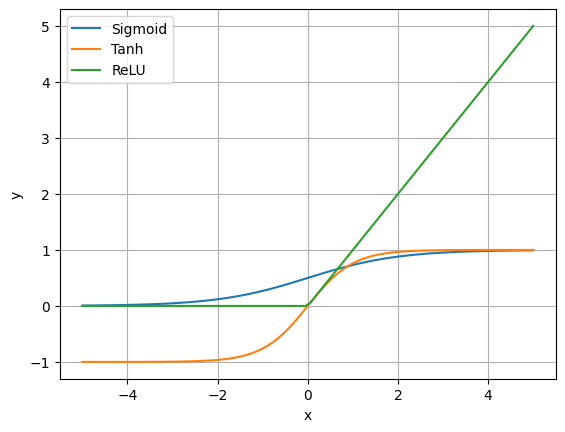

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Datos para graficar
x = np.linspace(-5, 5, 100)

# Graficar las funciones de activación
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')

# Configuraciones del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Mostrar el gráfico
plt.show()

- Definir método build y call de la clase Linear(keras.layers.Layer). Utilizar método self.add_weight para crear los pesos $W$ y $b$.

\begin{equation}
    y = Wx + b
\end{equation}


In [ ]:
class Linear(keras.layers.Layer):
    def __init__(self, num_outputs, activation=None):
        super().__init__()
        self.num_outputs = num_outputs
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
      input_dim = input_shape[-1]
      self.w = self.add_weight(shape=[input_dim, self.num_outputs], name="kernel")
      self.b = self.add_weight(shape=[self.num_outputs], name="kernel")

        
    def call(self, inputs):
      x = keras.ops.matmul(inputs, self.w) + self.b
      return self.activation(x)

In [ ]:
class Model(keras.Model):
    def __init__(self,activation):
        super().__init__()
        self.l1 = Linear(3,activation)
        self.l2 = Linear(1)

    def call(self, x):
        x = self.l1(x)
        x = self.l2(x)
        return x


### relu - 0.001

In [ ]:
layer = Linear(10, "relu")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [71]:
model = Model('relu')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

### relu - 0.1

In [ ]:
layer = Linear(10, "relu")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [79]:
model = Model('relu')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

### tanh - 0.1

In [ ]:
layer = Linear(10, "tanh")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [102]:
model = Model('tanh')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

### tanh - 0.001

In [ ]:
layer = Linear(10, "tanh")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [110]:
model = Model('tanh')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

### sigmoid - 0.001

In [ ]:
layer = Linear(10, "sigmoid")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [118]:
model = Model('sigmoid')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

### sigmoid - 0.1

In [ ]:
layer = Linear(10, "sigmoid")
x = tf.ones([1,10000])
out = layer(x)
out.shape

In [ ]:
test_batch = next(iter(train_ds))
test_batch[0]

In [127]:
model = Model('sigmoid')

In [ ]:
model(test_batch[0]).shape, test_batch[1].shape

In [ ]:
model(test_batch[0])[:, 0].shape

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"]
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
)

In [ ]:
history.history

In [ ]:
# Crear figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot de accuracy en el primer subplot
ax1.plot(history.history['accuracy'], 'bo-', label='Accuracy')
ax1.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Época')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot de error en el segundo subplot
ax2.plot(history.history['loss'], 'bo-', label='Loss')
ax2.plot(history.history['val_loss'], 'ro-', label='Validation Loss')
ax2.set_title('Error')
ax2.set_xlabel('Época')
ax2.set_ylabel('Error')
ax2.legend()

# Mostrar figura
plt.show()

## Conclusion

Después del ajuste de parámetros en el modelo con sigmoide con 0.001, se observa que el valor de 0.001 se adapta bien, también tanh 0.001, esto quiere decir que con ambos modelos podemos llegar a tener métricas altas para el modelo, pero siempre se tiene que evitar el overfitting, debido a que estos modelos se acoplan bien a los datos de prueba pero lo + probable es que falle cuando entren nuevos datos,así que se debería tener + cuidado en eso. 

Se debería establecer mejor los parámetros con el fin que generalice mejor